# Regresión Logística

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/bank-additional-full.csv', sep=';', header=0)
data = data.dropna()
print('filas: {0} - Columnas: {1}'.format(data.shape[0], data.shape[1]))
print('Encabezados de la data:\n',data.columns.values)

filas: 41188 - Columnas: 21
Encabezados de la data:
 ['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [5]:
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])

In [6]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

# Exploración de Datos

In [7]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

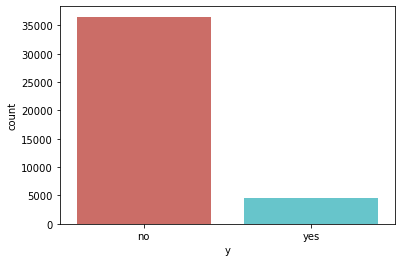

In [8]:
sns.countplot(x = 'y', data = data, palette = 'hls')
plt.show()

In [9]:
# balancera las clases
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [10]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [11]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


In [12]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


Text(0, 0.5, 'Frecuencia de compras')

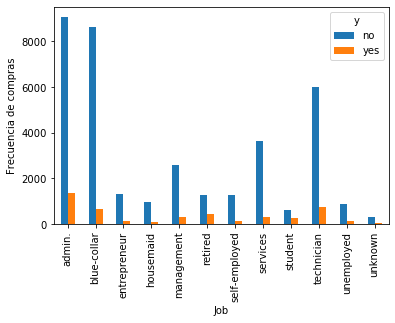

In [13]:
%matplotlib inline
pd.crosstab(data['job'], data['y']).plot(kind='bar')
plt.xlabel('Job')
plt.ylabel('Frecuencia de compras')

Text(0, 0.5, 'Frecuencia de compras')

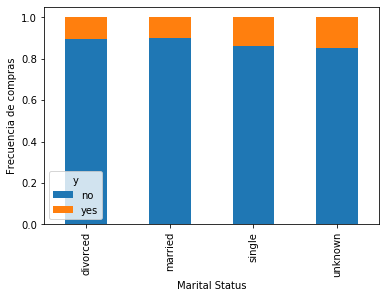

In [14]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Frecuencia de compras')

Text(0, 0.5, 'Frecuencia de compras')

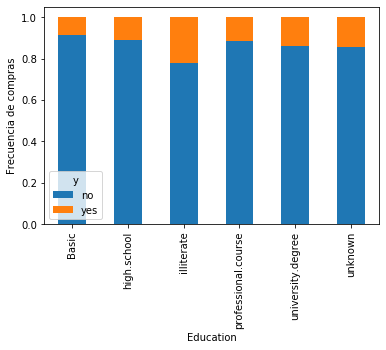

In [15]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Frecuencia de compras')

Text(0, 0.5, 'Frecuencia de compras')

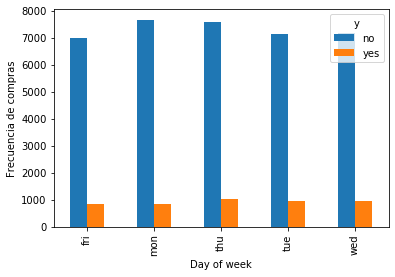

In [16]:
table = pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.xlabel('Day of week')
plt.ylabel('Frecuencia de compras')

Text(0, 0.5, 'Frecuencia de compras')

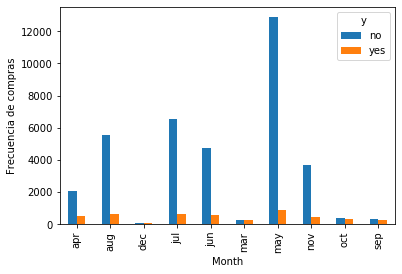

In [17]:
table = pd.crosstab(data.month, data.y).plot(kind="bar")
plt.xlabel('Month')
plt.ylabel('Frecuencia de compras')

Text(0, 0.5, 'Frecuencia')

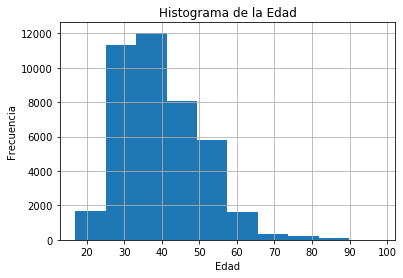

In [18]:
data.age.hist()
plt.title('Histograma de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia de compras')

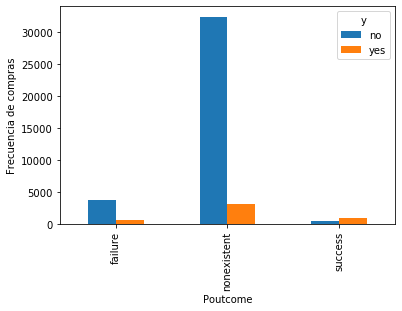

In [19]:
table = pd.crosstab(data.poutcome, data.y).plot(kind="bar")
plt.xlabel('Poutcome')
plt.ylabel('Frecuencia de compras')

# Creación de Variables Dummy

In [20]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1

In [21]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# obtenemos las columnas que hicimos dummies
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [23]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [24]:
data_final_vars = data_final.columns.values.tolist()
y=['y']
x=[i for i in data_final_vars if i not in y]

In [25]:
data_final.head(15)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
data_final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

# Over Sampling

In [28]:
import warnings
warnings.filterwarnings('ignore')

x = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE

os=SMOTE(random_state=1) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
os_data_x, os_data_y = os.fit_sample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x, columns=x_train.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])
print('tamaño over_sampli', len(os_data_x))
print('numero de no suscripciones de over_sampled data', len(os_data_y[os_data_y['y']=='no']))
print('numero de suscriptores',len(os_data_y[os_data_y['y']=='yes']))
print('porcion de no suscriptores en la data de over_sampled es: ', len(os_data_y[os_data_y['y']=='yes'])/len(os_data_x))
print('porcion de suscriptores en la data de over_sampled es: ', len(os_data_y[os_data_y['y']=='no'])/len(os_data_x))

tamaño over_sampli 58508
numero de no suscripciones de over_sampled data 29254
numero de suscriptores 29254
porcion de no suscriptores en la data de over_sampled es:  0.5
porcion de suscriptores en la data de over_sampled es:  0.5


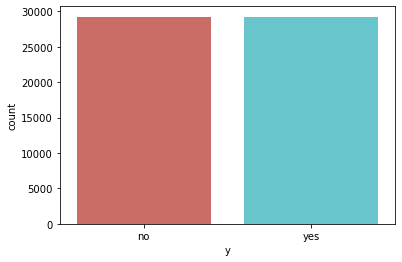

In [29]:
sns.countplot(x='y', data=os_data_y, palette='hls')
plt.show()

In [30]:
from sklearn.feature_selection import RFE
logreg=LogisticRegression(solver='lbfgs')
rfe=RFE(logreg, 30)
rfe=rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True False False False False  True False  True False False  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True  True  True  True  True  True  True
 False]
[28 29 24 30 25 19 20 26 22 27  5  1  1  2  4  9  3  1  8  1  6  7  1  1
  1  1  1  1 31  1  1  1  1  1 32  1  1  1  1  1  1  1  1 15 12 18 13 14
 21 11 10 17 16  1  1  1  1  1  1  1 23]


In [31]:
valid_cols = rfe.support_
valid_cols = list(valid_cols)
cols = list(x_train.columns)

In [32]:
from itertools import compress

real_cols = list(compress(cols, valid_cols))
real_cols

['job_blue-collar',
 'job_entrepreneur',
 'job_services',
 'job_technician',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent']

In [33]:
x = os_data_x[real_cols]
y = os_data_y['y']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn import metrics
logreg= LogisticRegression(solver='lbfgs')
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred=logreg.predict(x_test)

In [36]:
y_pred

array(['no', 'no', 'yes', ..., 'yes', 'no', 'yes'], dtype=object)

In [37]:
print('Precision del clasificador en el test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Precision del clasificador en el test set: 0.94


# Métricas

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold=model_selection.KFold(n_splits=10, random_state=5)

modelCV=LogisticRegression()

results= model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring='accuracy')

print("10-fold crood validation promedio de precision: {0}".format(results.mean()))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix (y_test, y_pred)
confusion_matrix

In [ ]:
y_pred

# Seguimiento

In [1]:
print("Accuracy del clasificador en el test set: {0}".format(logreg.score(x_test, y_test)))

NameError: name 'logreg' is not defined

In [2]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

 ## ROC Curve

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_predict = np.where(y_pread == 'yes', 1, 0)
y_test1 = np.where(y_test == 'yes', 1, 0)

logit_roc_auc = roc_auc_score(y_test1, y_predict)
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(x_test)[:,1])

plt.figure(figsize = (16,8))
plt.plot(fpr, tpr, label='Regresion Logistica (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'np' is not defined